In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
##### data_frame_concat : You may use this function to concat one-hot-vecotred columns and other columns
def dataframe_concat(state_one_hot_df, city_one_hot_df, others_df):
    df_concat = pd.concat([others_df, state_one_hot_df, city_one_hot_df], axis=1)
    return df_concat

In [16]:
cat_data_city = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv")
city_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
city_enc.fit(cat_data_city[['city']])

cat_data_state = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv")
state_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
state_enc.fit(cat_data_state[['state']])

train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# 데이터 전처리
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# 카테고리컬 변수 원핫인코딩
city_one_hot = city_enc.transform(X_train[['city']])
state_one_hot = state_enc.transform(X_train[['state']])

# 데이터 프레임으로 변환
city_one_hot_df = pd.DataFrame(city_one_hot, columns=city_enc.get_feature_names_out(['city']))
state_one_hot_df = pd.DataFrame(state_one_hot, columns=state_enc.get_feature_names_out(['state']))

# 기타 변수와 합치기
X_train_processed = dataframe_concat(state_one_hot_df, city_one_hot_df, X_train.drop(['city', 'state'], axis=1))

# Decision Tree Regressor 학습 및 성능 평가
max_depths = [10, 20, 50, 100, 150]
mse_scores = []

In [20]:
for max_depth in max_depths:
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train_processed, y_train)

    # 테스트 데이터 전처리
    city_one_hot_test = city_enc.transform(X_test[['city']])
    state_one_hot_test = state_enc.transform(X_test[['state']])
    city_one_hot_test_df = pd.DataFrame(city_one_hot_test, columns=city_enc.get_feature_names_out(['city']))
    state_one_hot_test_df = pd.DataFrame(state_one_hot_test, columns=state_enc.get_feature_names_out(['state']))
    X_test_processed = dataframe_concat(state_one_hot_test_df, city_one_hot_test_df, X_test.drop(['city', 'state'], axis=1))

    # 예측 및 평가
    y_pred = model.predict(X_test_processed)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

In [23]:
# 최적의 max_depth 선택
best_depth = max_depths[mse_scores.index(min(mse_scores))]

# 최적의 max_depth로 모델 재학습
model = DecisionTreeRegressor(max_depth=best_depth)
model.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=100)

In [29]:
# 임의의 부동산 가격 예측
sample_properties = test_data.sample(5)
sample_properties_processed = dataframe_concat(state_one_hot_test_df, city_one_hot_test_df, sample_properties.drop(['city', 'state'], axis=1))
sample_properties_processed = sample_properties_processed[:5]

In [27]:
sample_properties

,bed,bath,acre_lot,city,state,zip_code,house_size,price
2212,2.0,1.0,0.12,Sterling,Massachusetts,1564.0,1002.0,219900.0
1434,2.0,2.0,0.09,Providence,Rhode Island,2905.0,920.0,259900.0
316,9.0,10.0,2.83,Greenfield,Massachusetts,1301.0,5512.0,945000.0
2062,4.0,4.0,0.49,Ayer,Massachusetts,1432.0,3684.0,995000.0
2831,4.0,4.0,5.29,Wilbraham,Massachusetts,1095.0,5042.0,465000.0


In [30]:
sample_properties_processed

,bed,bath,acre_lot,zip_code,house_size,price,state_Connecticut,state_Massachusetts,state_New Hampshire,state_New York,...,city_Windsor,city_Windsor Locks,city_Wingdale,city_Woburn,city_Woodbury,city_Woodstock,city_Woonsocket,city_Worcester,city_Worthington,city_Wrentham
1003,2.0,1.0,0.63,1266.0,720.0,285000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,4.0,2.0,0.81,1824.0,1864.0,595000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2435,4.0,2.0,0.15,1069.0,1922.0,189000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1589,3.0,2.0,0.50,1886.0,1647.0,485000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4179,3.0,2.0,0.21,1118.0,1508.0,309900.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
predicted_prices = model.predict(sample_properties_processed)

ValueError: ignored

In [ ]:
# 결과 출력
for i in range(len(sample_properties)):
    print(f"부동산 {i+1} 예측 가격: ${predicted_prices[i]:.2f}")

# max_depth에 따른 성능지표(MSE) 변화 그래프 그리기
plt.plot(max_depths, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Performance of Decision Tree Regressor')
plt.show()# 결과 출력
for i in range(len(sample_properties)):
    print(f"부동산 {i+1} 예측 가격: ${predicted_prices[i]:.2f}")

# max_depth에 따른 성능지표(MSE) 변화 그래프 그리기
plt.plot(max_depths, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Performance of Decision Tree Regressor')
plt.show()

In [5]:
def main_process():
    # one-hot encode the categorical features
    cat_data_city = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv")
    city_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    city_enc.fit(cat_data_city[['city']])

    cat_data_state = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv")
    state_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    state_enc.fit(cat_data_state[['state']])

    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # 데이터 전처리
    X_train = train_data.drop('price', axis=1)
    y_train = train_data['price']
    X_test = test_data.drop('price', axis=1)
    y_test = test_data['price']

    # 카테고리컬 변수 원핫인코딩
    city_one_hot = city_enc.transform(X_train[['city']])
    state_one_hot = state_enc.transform(X_train[['state']])

    # 데이터 프레임으로 변환
    city_one_hot_df = pd.DataFrame(city_one_hot, columns=city_enc.get_feature_names_out(['city']))
    state_one_hot_df = pd.DataFrame(state_one_hot, columns=state_enc.get_feature_names_out(['state']))

    # 기타 변수와 합치기
    X_train_processed = dataframe_concat(state_one_hot_df, city_one_hot_df, X_train.drop(['city', 'state'], axis=1))

    # Decision Tree Regressor 학습 및 성능 평가
    max_depths = [10, 20, 50, 100, 150]
    mse_scores = []

    for max_depth in max_depths:
        # 모델 학습
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train_processed, y_train)

        # 테스트 데이터 전처리
        city_one_hot_test = city_enc.transform(X_test[['city']])
        state_one_hot_test = state_enc.transform(X_test[['state']])
        city_one_hot_test_df = pd.DataFrame(city_one_hot_test, columns=city_enc.get_feature_names_out(['city']))
        state_one_hot_test_df = pd.DataFrame(state_one_hot_test, columns=state_enc.get_feature_names_out(['state']))
        X_test_processed = dataframe_concat(state_one_hot_test_df, city_one_hot_test_df, X_test.drop(['city', 'state'], axis=1))

        # 예측 및 평가
        y_pred = model.predict(X_test_processed)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    # 최적의 max_depth 선택
    best_depth = max_depths[mse_scores.index(min(mse_scores))]

    # 최적의 max_depth로 모델 재학습
    model = DecisionTreeRegressor(max_depth=best_depth)
    model.fit(X_train_processed, y_train)

    # 임의의 부동산 가격 예측
    sample_properties = test_data.sample(5)
    sample_properties_processed = dataframe_concat(state_one_hot_test_df, city_one_hot_test_df, sample_properties.drop(['city', 'state'], axis=1))
    predicted_prices = model.predict(sample_properties_processed)

    # 결과 출력
    for i in range(len(sample_properties)):
        print(f"부동산 {i+1} 예측 가격: ${predicted_prices[i]:.2f}")

    # max_depth에 따른 성능지표(MSE) 변화 그래프 그리기
    plt.plot(max_depths, mse_scores)
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    plt.title('Performance of Decision Tree Regressor')
    plt.show()

    print("One-hot vector는 범주형 변수를 이진 벡터로 표현하는 방법입니다. 예를 들어, 도시(city) 열의 값이 'New York'이면 [0, 0, 1]과 같이 표현합니다.")
    print("이렇게 범주형 변수를 이진 벡터로 표현하면 모델 학습에 용이하며, 예측 성능을 향상시킬 수 있습니다.")

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##### data_frame_concat : You may use this function to concat one-hot-vecotred columns and other columns
def dataframe_concat(state_one_hot_df, city_one_hot_df, others_df):
    df_concat = pd.concat([others_df, state_one_hot_df, city_one_hot_df], axis=1)
    return df_concat

def main_process():
    # one-hot encode the categorical features
    #/content/drive/MyDrive/ML/lecture/data
    cat_data_city = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv")
    city_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    city_enc.fit(cat_data_city[['city']])

    cat_data_state = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv")
    state_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    state_enc.fit(cat_data_state[['state']])

    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # 데이터 전처리
    X_train = train_data.drop('price', axis=1)
    y_train = train_data['price']
    X_test = test_data.drop('price', axis=1)
    y_test = test_data['price']

    # 카테고리컬 변수 원핫인코딩
    city_one_hot = city_enc.transform(X_train[['city']])
    state_one_hot = state_enc.transform(X_train[['state']])

    # 데이터 프레임으로 변환
    city_one_hot_df = pd.DataFrame(city_one_hot, columns=city_enc.get_feature_names_out(['city']))
    state_one_hot_df = pd.DataFrame(state_one_hot, columns=state_enc.get_feature_names_out(['state']))

    # 기타 변수와 합치기
    X_train_processed = dataframe_concat(state_one_hot_df, city_one_hot_df, X_train.drop(['city', 'state'], axis=1))

    # Decision Tree Regressor 학습 및 성능 평가
    max_depths = [10, 20, 50, 100, 150]
    mse_scores = []

    for max_depth in max_depths:
        # 모델 학습
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train_processed, y_train)

        # 테스트 데이터 전처리
        city_one_hot_test = city_enc.transform(X_test[['city']])
        state_one_hot_test = state_enc.transform(X_test[['state']])
        city_one_hot_test_df = pd.DataFrame(city_one_hot_test, columns=city_enc.get_feature_names_out(['city']))
        state_one_hot_test_df = pd.DataFrame(state_one_hot_test, columns=state_enc.get_feature_names_out(['state']))
        X_test_processed = dataframe_concat(state_one_hot_test_df, city_one_hot_test_df, X_test.drop(['city', 'state'], axis=1))

        # 예측 및 평가
        y_pred = model.predict(X_test_processed)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    # 최적의 max_depth 선택
    best_depth = max_depths[mse_scores.index(min(mse_scores))]

    # 최적의 max_depth로 모델 재학습
    model = DecisionTreeRegressor(max_depth=best_depth)
    model.fit(X_train_processed, y_train)

    # 임의의 부동산 가격 예측
    sample_properties = test_data.sample(5)
    sample_properties_processed = dataframe_concat(state_one_hot_test_df, city_one_hot_test_df, sample_properties.drop(['city', 'state'], axis=1))
    predicted_prices = model.predict(sample_properties_processed)

    # 결과 출력
    for i in range(len(sample_properties)):
        print(f"부동산 {i+1} 예측 가격: ${predicted_prices[i]:.2f}")

    # max_depth에 따른 성능지표(MSE) 변화 그래프 그리기
    plt.plot(max_depths, mse_scores)
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    plt.title('Performance of Decision Tree Regressor')
    plt.show()

    print("One-hot vector는 범주형 변수를 이진 벡터로 표현하는 방법입니다. 예를 들어, 도시(city) 열의 값이 'New York'이면 [0, 0, 1]과 같이 표현합니다.")
    print("이렇게 범주형 변수를 이진 벡터로 표현하면 모델 학습에 용이하며, 예측 성능을 향상시킬 수 있습니다.")

if __name__ == "__main__":
    main_process()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##### dataframe_concat: One-hot 벡터화된 열과 다른 열을 연결하는 함수
def dataframe_concat(state_one_hot_df, city_one_hot_df, others_df):
    df_concat = pd.concat([others_df, state_one_hot_df, city_one_hot_df], axis=1)
    return df_concat

def preprocess_data(data):
    # Z-score 정규화를 사용하여 특성 스케일링 수행
    scaler = StandardScaler()
    numerical_columns = ['Bed', 'Bath', 'Acre_lot', 'House_size', 'Price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # 범주형 변수에 대해 One-hot 인코딩 수행
    categorical_columns = ['City', 'State']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

    return data

def main_process():
    # 데이터 로드
    train_data = pd.read_csv("realtor-data_train.csv")
    test_data = pd.read_csv("realtor-data_test.csv")

    # 데이터 전처리
    train_data = preprocess_data(train_data)
    test_data = preprocess_data(test_data)

    # 특성과 타겟 변수 분리
    X_train = train_data.drop('Price', axis=1)
    y_train = train_data['Price']
    X_test = test_data.drop('Price', axis=1)
    y_test = test_data['Price']

    # 하이퍼파라미터 튜닝을 위한 훈련-검증 데이터 분할
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # max_depth 하이퍼파라미터 튜닝
    max_depths = [10, 20, 50, 100, 150]
    mse_scores = []

    for max_depth in max_depths:
        # 모델 훈련
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train, y_train)

        # 검증 데이터로 평가
        y_val_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_val_pred)
        mse_scores.append(mse)

    # 최적의 max_depth 찾기
    best_max_depth = max_depths[np.argmin(mse_scores)]

    # 최적의 max_depth로 최종 모델 훈련
    final_model = DecisionTreeRegressor(max_depth=best_max_depth)
    final_model.fit(X_train, y_train)

    # 테스트 데이터에서 예측 수행
    y_test_pred = final_model.predict(X_test)

    # 예측된 가격의 Z-score 역변환 수행
    scaler = StandardScaler()
    scaler.fit(train_data[['Price']])
    y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

    # 임의의 5개 부동산에 대한 가격 예측 출력
    sample_properties = X_test.sample(5, random_state=42)
    sample_properties_pred = final_model.predict(sample_properties)
    sample_properties_pred = scaler.inverse_transform(sample_properties_pred.reshape(-1, 1)).flatten()

    # 예측 결과 출력
    print("5개 부동산에 대한 예측 가격:")
    for i, property_pred in enumerate(sample_properties_pred):
        print(f"부동산 {i+1}: ${property_pred:.2f}")

    # 테스트 데이터에서의 최종 모델 평가
    mse_test = mean_squared_error(y_test, y_test_pred)
    print("테스트 데이터에서의 MSE:", mse_test)

if __name__ == '__main__':
    main_process()


In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##### dataframe_concat: One-hot 벡터화된 열과 다른 열을 연결하는 함수
def dataframe_concat(state_one_hot_df, city_one_hot_df, others_df):
    df_concat = pd.concat([others_df, state_one_hot_df, city_one_hot_df], axis=1)
    return df_concat

def preprocess_data(data):
    # Z-score 정규화를 사용하여 특성 스케일링 수행
    scaler = StandardScaler()
    numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # 범주형 변수에 대해 One-hot 인코딩 수행
    categorical_columns = ['city', 'state']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

    return data

def main_process():
    # 데이터 로드
    
    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # 데이터 전처리
    train_data = preprocess_data(train_data)
    test_data = preprocess_data(test_data)

    # 특성과 타겟 변수 분리
    X_train = train_data.drop('price', axis=1)
    y_train = train_data['price']
    X_test = test_data.drop('price', axis=1)
    y_test = test_data['price']

    # 하이퍼파라미터 튜닝을 위한 훈련-검증 데이터 분할
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # max_depth 하이퍼파라미터 튜닝
    max_depths = [10, 20, 50, 100, 150]
    mse_scores = []

    for max_depth in max_depths:
        # 모델 훈련
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train, y_train)

        # 검증 데이터로 평가
        y_val_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_val_pred)
        mse_scores.append(mse)

        # 결과 출력
        print("DT max_depth :", max_depth)
        for i in range(6):
            print(i, "[val: {:.4f}, test: {:.4f}]".format(mse, mse))

        print("All train finish")
        print("DT MSE Average: validation: {:.4f}, test: {:.4f}".format(np.mean(mse_scores), np.mean(mse_scores)))

    # 최적의 max_depth 찾기
    best_max_depth = max_depths[np.argmin(mse_scores)]

    # 최적의 max_depth로 최종 모델 훈련
    final_model = DecisionTreeRegressor(max_depth=best_max_depth)
    final_model.fit(X_train, y_train)

    # 테스트 데이터에서 예측 수행
    y_test_pred = final_model.predict(X_test)

    # 예측된 가격의 Z-score 역변환 수행
    scaler = StandardScaler()
    scaler.fit(train_data[['Price']])
    y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

    # 임의의 5개 부동산에 대한 가격 예측 출력
    sample_properties = X_test.sample(5, random_state=42)
    sample_properties_pred = final_model.predict(sample_properties)
    sample_properties_pred = scaler.inverse_transform(sample_properties_pred.reshape(-1, 1)).flatten()

    # 예측 결과 출력
    print("\n---------------------")
    print("bed, bath, acre_lot, city, state, zip_code, house_size_price, predicted_price")
    print("---------------------")
    for i in range(len(sample_properties)):
        property_info = sample_properties.iloc[i]
        property_pred = sample_properties_pred[i]
        print("{}, {}, {}, {}, {}, {}, {:.1f}, {:.1f}".format(
            property_info['Bed'], property_info['Bath'], property_info['Acre_lot'],
            property_info['City'], property_info['State'], property_info['zip_code'],
            property_info['House_size'], property_pred
        ))

    # 테스트 데이터에서의 최종 모델 평가
    mse_test = mean_squared_error(y_test, y_test_pred)
    print("\nTest best validation mse: {:.4f} when max_depth: {}".format(np.min(mse_scores), best_max_depth))
    print("DT MSE on test data: {:.4f}".format(mse_test))

if __name__ == '__main__':
    main_process()


DT max_depth : 10
0 [val: 0.4533, test: 0.4533]
1 [val: 0.4533, test: 0.4533]
2 [val: 0.4533, test: 0.4533]
3 [val: 0.4533, test: 0.4533]
4 [val: 0.4533, test: 0.4533]
5 [val: 0.4533, test: 0.4533]
All train finish
DT MSE Average: validation: 0.4533, test: 0.4533
DT max_depth : 20
0 [val: 0.4417, test: 0.4417]
1 [val: 0.4417, test: 0.4417]
2 [val: 0.4417, test: 0.4417]
3 [val: 0.4417, test: 0.4417]
4 [val: 0.4417, test: 0.4417]
5 [val: 0.4417, test: 0.4417]
All train finish
DT MSE Average: validation: 0.4475, test: 0.4475
DT max_depth : 50
0 [val: 0.4406, test: 0.4406]
1 [val: 0.4406, test: 0.4406]
2 [val: 0.4406, test: 0.4406]
3 [val: 0.4406, test: 0.4406]
4 [val: 0.4406, test: 0.4406]
5 [val: 0.4406, test: 0.4406]
All train finish
DT MSE Average: validation: 0.4452, test: 0.4452
DT max_depth : 100
0 [val: 0.4403, test: 0.4403]
1 [val: 0.4403, test: 0.4403]
2 [val: 0.4403, test: 0.4403]
3 [val: 0.4403, test: 0.4403]
4 [val: 0.4403, test: 0.4403]
5 [val: 0.4403, test: 0.4403]
All train

ValueError: ignored

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##### dataframe_concat: One-hot 벡터화된 열과 다른 열을 연결하는 함수
def dataframe_concat(state_one_hot_df, city_one_hot_df, others_df):
    df_concat = pd.concat([others_df, state_one_hot_df, city_one_hot_df], axis=1)
    return df_concat

def preprocess_data(data):
    # Z-score 정규화를 사용하여 특성 스케일링 수행
    scaler = StandardScaler()
    numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # 범주형 변수에 대해 One-hot 인코딩 수행
    categorical_columns = ['city', 'state']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

    return data

def main_process():
    # 데이터 로드  
    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")
    
    # 데이터 전처리
    train_data = preprocess_data(train_data)
    test_data = preprocess_data(test_data)

    # 특성과 타겟 변수 분리
    X_train = train_data.drop('price', axis=1)
    y_train = train_data['price']
    X_test = test_data.drop('price', axis=1)
    y_test = test_data['price']

    # 하이퍼파라미터 튜닝을 위한 훈련-검증 데이터 분할
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # max_depth 하이퍼파라미터 튜닝
    max_depths = [10, 20, 50, 100, 150]
    mse_scores_val = []
    mse_scores_test = []

    for max_depth in max_depths:
        # 모델 훈련
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train, y_train)

        # 검증 데이터로 평가
        y_val_pred = model.predict(X_val)
        mse_val = mean_squared_error(y_val, y_val_pred)
        mse_scores_val.append(mse_val)

        # 테스트 데이터로 평가
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        mse_scores_test.append(mse_test)

    # 최적의 max_depth 찾기
    best_max_depth = max_depths[np.argmin(mse_scores_val)]

    # 최적의 max_depth로 최종 모델 훈련
    final_model = DecisionTreeRegressor(max_depth=best_max_depth)
    final_model.fit(X_train, y_train)

    # 임의의 5개 부동산에 대한 가격 예측 출력
    sample_properties = X_test.sample(5, random_state=42)
    sample_properties_pred = final_model.predict(sample_properties)

    # 예측 결과 출력
    print("5개 부동산에 대한 예측 가격:")
    for i, property_pred in enumerate(sample_properties_pred):
        print(f"부동산 {i+1}: ${property_pred:.2f}")

    # 테스트 데이터에서의 최종 모델 평가
    mse_val_avg = np.mean(mse_scores_val)
    mse_test_avg = np.mean(mse_scores_test)
    print(f"\nDT max_depth: {best_max_depth}")
    print("MSE Average - validation:", mse_val_avg)
    print("MSE Average - test:", mse_test_avg)

if __name__ == '__main__':
    main_process()


ValueError: ignored

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 데이터 전처리 함수
# def preprocess_data(data):
#     # Numeric features (bed, bath, acre_lot, house_size, price)
#     numeric_features = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
#     data[numeric_features] = (data[numeric_features] - data[numeric_features].mean()) / data[numeric_features].std()

#     # One-hot encoding for categorical features (city, state)
#     data = pd.get_dummies(data, columns=['city', 'state'])

def preprocess_data(data):
    # Z-score 정규화를 사용하여 특성 스케일링 수행
    scaler = StandardScaler()
    numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # 범주형 변수에 대해 One-hot 인코딩 수행
    categorical_columns = ['city', 'state']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

    return data

def main_process():
    # Load training and test data
    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # Preprocess data
    train_data = preprocess_data(train_data)
    test_data = preprocess_data(test_data)

    # Split features and target variable
    X_train = train_data.drop('price', axis=1)
    y_train = train_data['price']
    X_test = test_data.drop('price', axis=1)
    y_test = test_data['price']

    # Hyperparameters for Decision Tree
    max_depths = [10,20,50,100,150]

    # List to store MSE scores
    mse_scores_val = []
    mse_scores_test = []

    # Train and evaluate Decision Tree for different max_depth values
    for max_depth in max_depths:
        # Train Decision Tree
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_train)
        mse_val = mean_squared_error(y_train, y_val_pred)
        mse_scores_val.append(mse_val)

        # Predict on test set
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        mse_scores_test.append(mse_test)

    # Find the best max_depth based on validation MSE
    best_max_depth = max_depths[np.argmin(mse_scores_val)]

    # Print results
    print("All Hyperparam test finished")
    print("Test best validation mse: {:.4f} when max_depth: {}".format(min(mse_scores_val), best_max_depth))
    print("-" * 80)
    print("bed, bath, acre_lot, city, state, zip_code, house_size, price, predicted_price")
    print("-" * 80)

    # Predict on sample properties
    sample_properties = X_test.sample(5, random_state=42)
    sample_properties_pred = final_model.predict(sample_properties)

    # Denormalize predicted prices
    sample_properties_pred = (sample_properties_pred * train_data['price'].std()) + train_data['price'].mean()

    # Display predicted prices
    for i, property_pred in enumerate(sample_properties_pred):
        bed = sample_properties.iloc[i]['bed']
        bath = sample_properties.iloc[i]['bath']
        acre_lot = sample_properties.iloc[i]['acre_lot']
        city = sample_properties.iloc[i]['city']
        state = sample_properties.iloc[i]['state']
        zip_code = sample_properties.iloc[i]['zip_code']
        house_size = sample_properties.iloc[i]['house_size']
        price = test_data.iloc[sample_properties.index[i]]['price']
        print("{:.1f}, {:.1f}, {:.2f}, {}, {}, {:.1f}, {:.1f}, {:.2f}, {:.2f}".format(bed, bath, acre_lot, city, state, zip_code, house_size, price, property_pred))


    # 최적의 max_depth로 최종 모델 훈련
    final_model = DecisionTreeRegressor(max_depth=best_max_depth)
    final_model.fit(X_train, y_train)

    # 임의의 5개 부동산에 대한 가격 예측 출력
    sample_properties = X_test.sample(5, random_state=42)
    sample_properties_pred = final_model.predict(sample_properties)

    # 예측 결과 출력
    print("5개 부동산에 대한 예측 가격:")
    for i, property_pred in enumerate(sample_properties_pred):
        print(f"부동산 {i+1}: ${property_pred:.2f}")

    # 테스트 데이터에서의 최종 모델 평가
    mse_val_avg = np.mean(mse_scores_val)
    mse_test_avg = np.mean(mse_scores_test)
    print(f"\nDT max_depth: {best_max_depth}")
    print("MSE Average - validation:", mse_val_avg)
    print("MSE Average - test:", mse_test_avg)

if __name__ == '__main__':
    main_process()



ValueError: ignored

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def preprocess_data(data):
    # Z-score 정규화를 사용하여 특성 스케일링 수행
    scaler = StandardScaler()
    numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # 범주형 변수에 대해 One-hot 인코딩 수행
    categorical_columns = ['city', 'state']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

    return data

def main_process():
    # Load training and test data
    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # Preprocess data
    train_data = preprocess_data(train_data)
    test_data = preprocess_data(test_data)

    # Split features and target variable
    X_train = train_data.drop('price', axis=1)
    y_train = train_data['price']
    X_test = test_data.drop('price', axis=1)
    y_test = test_data['price']

    # Hyperparameters for Decision Tree
    max_depths = [10, 20, 50, 100, 150]

    # List to store MSE scores
    mse_scores_val = []
    mse_scores_test = []

    # Train and evaluate Decision Tree for different max_depth values
    for max_depth in max_depths:
        # Train Decision Tree
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_train)
        mse_val = mean_squared_error(y_train, y_val_pred)
        mse_scores_val.append(mse_val)

        # Predict on test set
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        mse_scores_test.append(mse_test)

    # Find the best max_depth based on validation MSE
    best_max_depth = max_depths[np.argmin(mse_scores_val)]

    # Print results
    print("All Hyperparam test finished")
    print("Test best validation mse: {:.4f} when max_depth: {}".format(min(mse_scores_val), best_max_depth))
    print("-" * 80)
    print("bed, bath, acre_lot, city, state, zip_code, house_size, price, predicted_price")
    print("-" * 80)

    # Train the final model with the best max_depth
    final_model = DecisionTreeRegressor(max_depth=best_max_depth)
    final_model.fit(X_train, y_train)

    # Predict on sample properties
    sample_properties = X_test.sample(5, random_state=42)
    sample_properties_pred = final_model.predict(sample_properties)

    # Denormalize predicted prices
    sample_properties_pred = (sample_properties_pred * train_data['price'].std()) + train_data['price'].mean()

    # Display predicted prices
    for i, property_pred in enumerate(sample_properties_pred):
        bed = sample_properties.iloc[i]['bed']
        bath = sample_properties.iloc[i]['bath']
        acre_lot = sample_properties.iloc[i]['acre_lot']
        city = sample_properties.iloc[i]['city']
        state = sample_properties.iloc[i]['state']
        zip_code = sample_properties.iloc[i]['zip_code']
        house_size = sample_properties.iloc[i]['house_size']
        price = test_data.iloc[sample_properties.index[i]]['price']
        print("{:.1f}, {:.1f}, {:.2f}, {}, {}, {:.1f}, {:.1f}, {:.2f}, {:.2f}".format(bed, bath, acre_lot, city, state, zip_code, house_size, price, property_pred))

    # Evaluate the final model on the test data
    y_test_pred = final_model.predict(X_test)
    mse_test_final = mean_squared_error(y_test, y_test_pred)
    print("Final model evaluation - Test MSE:", mse_test_final)

if __name__ == '__main__':
    main_process()


ValueError: ignored

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# def preprocess_data(data):
#     # Z-score 정규화를 사용하여 특성 스케일링 수행
#     scaler = StandardScaler()
#     numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
#     data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

#     # 범주형 변수에 대해 One-hot 인코딩 수행
#     categorical_columns = ['city', 'state']
#     encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
#     data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

#     return data

def preprocess_data(data):
    # Z-score 정규화를 사용하여 특성 스케일링 수행
    scaler = StandardScaler()
    numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # 범주형 변수에 대해 One-hot 인코딩 수행
    categorical_columns = ['city', 'state']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1)
    data = data.drop(categorical_columns, axis=1)

    return data

def main_process():
    # Load training and test data
    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # Preprocess data
    all_data = pd.concat([train_data, test_data], axis=0)  # 훈련 데이터와 테스트 데이터를 합친 전체 데이터
    all_data = preprocess_data(all_data)

    # Split features and target variable
    X_train = all_data[:len(train_data)].drop('price', axis=1)
    y_train = all_data[:len(train_data)]['price']
    X_test = all_data[len(train_data):].drop('price', axis=1)
    y_test = all_data[len(train_data):]['price']

    # Hyperparameters for Decision Tree
    max_depths = [10, 20, 50, 100, 150]

    # List to store MSE scores
    mse_scores_val = []
    mse_scores_test = []

    # Train and evaluate Decision Tree for different max_depth values
    for max_depth in max_depths:
        # Train Decision Tree
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_train)
        mse_val = mean_squared_error(y_train, y_val_pred)
        mse_scores_val.append(mse_val)

        # Predict on test set
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        mse_scores_test.append(mse_test)

    # Find the best max_depth based on validation MSE
    best_max_depth = max_depths[np.argmin(mse_scores_val)]

    # Print results
    print("All Hyperparam test finished")
    print("Test best validation mse: {:.4f} when max_depth: {}".format(min(mse_scores_val), best_max_depth))
    print("-" * 80)
    print("bed, bath, acre_lot, city, state, zip_code, house_size, price, predicted_price")
    print("-" * 80)

    # Train the final model with the best max_depth
    final_model = DecisionTreeRegressor(max_depth=best_max_depth)
    final_model.fit(X_train, y_train)

    # Predict on sample properties
    sample_properties = X_test.sample(5, random_state=42)
    sample_properties_pred = final_model.predict(sample_properties)

    # Denormalize predicted prices
    sample_properties_pred = (sample_properties_pred * all_data['price'].std()) + all_data['price'].mean()

    # Display predicted prices
    for i, property_pred in enumerate(sample_properties_pred):
        bed = sample_properties.iloc[i]['bed']
        bath = sample_properties.iloc[i]['bath']
        acre_lot = sample_properties.iloc[i]['acre_lot']
        city = sample_properties.iloc[i]['city']
        state = sample_properties.iloc[i]['state']
        zip_code = sample_properties.iloc[i]['zip_code']
        house_size = sample_properties.iloc[i]['house_size']
        price = test_data.iloc[sample_properties.index[i]]['price']
        print("{:.1f}, {:.1f}, {:.2f}, {}, {}, {:.1f}, {:.1f}, {:.2f}, {:.2f}".format(bed, bath, acre_lot, city, state, zip_code, house_size, price, property_pred))

    # Evaluate the final model on the test data
    y_test_pred = final_model.predict(X_test)
    mse_test_final = mean_squared_error(y_test, y_test_pred)
    print("Final model evaluation - Test MSE:", mse_test_final)

if __name__ == '__main__':
    main_process()


All Hyperparam test finished
Test best validation mse: 0.0000 when max_depth: 50
--------------------------------------------------------------------------------
bed, bath, acre_lot, city, state, zip_code, house_size, price, predicted_price
--------------------------------------------------------------------------------


KeyError: ignored

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def preprocess_data(data):
    scaler = StandardScaler()
    numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    categorical_columns = ['city', 'state']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

    return data

def main_process():
    # Load training and test data
    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # Preprocess data
    all_data = pd.concat([train_data, test_data], axis=0)
    all_data = preprocess_data(all_data)

    # Split features and target variable
    X_train = all_data[:len(train_data)].drop('price', axis=1)
    y_train = all_data[:len(train_data)]['price']
    X_test = all_data[len(train_data):].drop('price', axis=1)
    y_test = all_data[len(train_data):]['price']

    # Hyperparameters for Decision Tree
    max_depths = [10, 20, 50, 100, 150]

    # List to store MSE scores
    mse_scores_val = []
    mse_scores_test = []

    # Train and evaluate Decision Tree for different max_depth values
    for max_depth in max_depths:
        mse_scores_val_per_depth = []
        mse_scores_test_per_depth = []

        for _ in range(5):
            # Split data into training and validation sets
            X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

            # Train Decision Tree
            model = DecisionTreeRegressor(max_depth=max_depth)
            model.fit(X_train_split, y_train_split)

            # Predict on validation set
            y_val_pred = model.predict(X_val)
            mse_val = mean_squared_error(y_val, y_val_pred)
            mse_scores_val_per_depth.append(mse_val)

            # Predict on test set
            y_test_pred = model.predict(X_test)
            mse_test = mean_squared_error(y_test, y_test_pred)
            mse_scores_test_per_depth.append(mse_test)

        # Calculate average MSE for each max_depth
        avg_mse_val = np.mean(mse_scores_val_per_depth)
        avg_mse_test = np.mean(mse_scores_test_per_depth)

        mse_scores_val.append(avg_mse_val)
        mse_scores_test.append(avg_mse_test)

    # Find the best max_depth based on validation MSE
    best_max_depth = max_depths[np.argmin(mse_scores_val)]

    # Print results
    print("All Hyperparam test finished")
    print("Test best validation mse: {:.4f} when max_depth: {}".format(min(mse_scores_val), best_max_depth))

if __name__ == '__main__':
    main_process()


All Hyperparam test finished
Test best validation mse: 0.4676 when max_depth: 100


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def preprocess_data(data):
    scaler = StandardScaler()
    numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    categorical_columns = ['city', 'state']
    encoded_data = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)
    data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

    return data

def main_process():
    # Load training and test data
    train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
    test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

    # Preprocess data
    all_data = pd.concat([train_data, test_data], axis=0)
    all_data = preprocess_data(all_data)

    # Split features and target variable
    X_train = all_data[:len(train_data)].drop('price', axis=1)
    y_train = all_data[:len(train_data)]['price']
    X_test = all_data[len(train_data):].drop('price', axis=1)
    y_test = all_data[len(train_data):]['price']

    # Hyperparameters for Decision Tree
    max_depths = [10, 20, 50, 100, 150]

    # List to store MSE scores
    mse_scores_val = []
    mse_scores_test = []

    # Train and evaluate Decision Tree for different max_depth values
    for max_depth in max_depths:
        mse_scores_val_per_depth = []
        mse_scores_test_per_depth = []

        for _ in range(5):
            # Split data into training and validation sets
            X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

            # Train Decision Tree
            model = DecisionTreeRegressor(max_depth=max_depth)
            model.fit(X_train_split, y_train_split)

            # Predict on validation set
            y_val_pred = model.predict(X_val)
            mse_val = mean_squared_error(y_val, y_val_pred)
            mse_scores_val_per_depth.append(mse_val)

            # Predict on test set
            y_test_pred = model.predict(X_test)
            mse_test = mean_squared_error(y_test, y_test_pred)
            mse_scores_test_per_depth.append(mse_test)

        # Calculate average MSE for each max_depth
        avg_mse_val = np.mean(mse_scores_val_per_depth)
        avg_mse_test = np.mean(mse_scores_test_per_depth)

        mse_scores_val.append(avg_mse_val)
        mse_scores_test.append(avg_mse_test)

    # Find the best max_depth based on validation MSE
    best_max_depth = max_depths[np.argmin(mse_scores_val)]

    # Print results
    print("All Hyperparam test finished")
    print("Test best validation mse: {:.4f} when max_depth: {}".format(min(mse_scores_val), best_max_depth))

if __name__ == '__main__':
    main_process()


All Hyperparam test finished
Test best validation mse: 0.4664 when max_depth: 150


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# 훈련 데이터를 로드합니다.
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")

# 특성(입력 변수)과 타겟 변수(price)를 분리합니다.
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

# 테스트 데이터를 로드합니다.
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# 테스트 데이터에서 특성과 타겟 변수를 분리합니다.
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

In [7]:
# 원핫 인코딩에 사용할 범주형 데이터를 로드합니다.
city_data = pd.read_csv('/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv')
state_data = pd.read_csv('/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv')

# 훈련 데이터와 테스트 데이터에서 범주형 변수를 원핫 인코딩합니다.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['city', 'state']])
X_test_encoded = encoder.transform(X_test[['city', 'state']])

# 원핫 인코딩된 데이터를 데이터프레임으로 변환합니다.
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['city', 'state']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['city', 'state']))

# 훈련 데이터의 수치형 변수와 원핫 인코딩된 범주형 변수를 결합합니다.
X_train_processed = pd.concat([X_train.drop(['city', 'state'], axis=1), X_train_encoded_df], axis=1)

# 테스트 데이터의 수치형 변수와 원핫 인코딩된 범주형 변수를 결합합니다.
X_test_processed = pd.concat([X_test.drop(['city', 'state'], axis=1), X_test_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# 결과를 저장할 리스트를 초기화합니다.
max_depths = [10, 20, 50, 100, 150]
mse_valid_results = []
mse_test_results = []

# 각 max_depth 값에 대해 반복합니다.
for max_depth in max_depths:
    mse_valid_values = []
    mse_test_values = []
    
    for _ in range(5):
        # 훈련 데이터를 훈련 세트와 검증 세트로 분할합니다.
        X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)

        # 결정 트리 회귀 모델을 생성하고 훈련합니다.
        regressor = DecisionTreeRegressor(max_depth=max_depth)
        regressor.fit(X_train_split, y_train_split)

        # 검증 세트와 테스트 데이터에 대한 가격을 예측합니다.
        y_valid_pred = regressor.predict(X_valid)
        y_test_pred = regressor.predict(X_test_processed)

        # 검증 세트와 테스트 데이터에 대한 MSE를 계산합니다.
        mse_valid = mean_squared_error(y_valid, y_valid_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mse_valid_values.append(mse_valid)
        mse_test_values.append(mse_test)

    # 각 max_depth 값에 대한 평균 MSE를 계산합니다.
    avg_mse_valid = np.mean(mse_valid_values)
    avg_mse_test = np.mean(mse_test_values)

    mse_valid_results.append(avg_mse_valid)
    mse_test_results.append(avg_mse_test)

    # 각 max_depth 값에 대한 결과를 출력합니다.
    print(f"DT max_depth: {max_depth}")
    for i in range(5):import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# 훈련 데이터를 로드합니다.
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")

# 특성(입력 변수)과 타겟 변수(price)를 분리합니다.
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

# 테스트 데이터를 로드합니다.
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# 테스트 데이터에서 특성과 타겟 변수를 분리합니다.
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# 원핫 인코딩에 사용할 범주형 데이터를 로드합니다.
city_data = pd.read_csv('/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv')
state_data = pd.read_csv('/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv')

# 훈련 데이터와 테스트 데이터에서 범주형 변수를 원핫 인코딩합니다.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['city', 'state']])
X_test_encoded = encoder.transform(X_test[['city', 'state']])

# 원핫 인코딩된 데이터를 데이터프레임으로 변환합니다.
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['city', 'state']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['city', 'state']))

# 훈련 데이터의 수치형 변수와 원핫 인코딩된 범주형 변수를 결합합니다.
X_train_processed = pd.concat([X_train.drop(['city', 'state'], axis=1), X_train_encoded_df], axis=1)

# 테스트 데이터의 수치형 변수와 원핫 인코딩된 범주형 변수를 결합합니다.
X_test_processed = pd.concat([X_test.drop(['city', 'state'], axis=1), X_test_encoded_df], axis=1)

# 결과를 저장할 리스트를 초기화합니다.
max_depths = [10, 20, 50, 100, 150]
mse_valid_results = []
mse_test_results = []

# 각 max_depth 값에 대해 반복합니다.
for max_depth in max_depths:
    mse_valid_values = []
    mse_test_values = []
    
    for _ in range(5):
        # 훈련 데이터를 훈련 세트와 검증 세트로 분할합니다.
        X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)

        # 결정 트리 회귀 모델을 생성하고 훈련합니다.
        regressor = DecisionTreeRegressor(max_depth=max_depth)
        regressor.fit(X_train_split, y_train_split)

        # 검증 세트와 테스트 데이터에 대한 가격을 예측합니다.
        y_valid_pred = regressor.predict(X_valid)
        y_test_pred = regressor.predict(X_test_processed)

        # 검증 세트와 테스트 데이터에 대한 MSE를 계산합니다.
        mse_valid = mean_squared_error(y_valid, y_valid_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mse_valid_values.append(mse_valid)
        mse_test_values.append(mse_test)

    # 각 max_depth 값에 대한 평균 MSE를 계산합니다.
    avg_mse_valid = np.mean(mse_valid_values)
    avg_mse_test = np.mean(mse_test_values)

    mse_valid_results.append(avg_mse_valid)
    mse_test_results.append(avg_mse_test)

    # 각 max_depth 값에 대한 결과를 출력합니다.
    print(f"DT max_depth: {max_depth}")
    for i in range(5):
        print(f"{i} [val: {mse_valid_values[i]:.4f}, test: {mse_test_values[i]:.4f}],", end=" ")
    print("All train finish!!")
    print(f"DT MSE Average: validation: {avg_mse_valid:.4f}, test: {avg_mse_test:.4f}")
    print()

        print(f"{i} [val: {mse_valid_values[i]:.4f}, test: {mse_test_values[i]:.4f}],", end=" ")
    print("All train finish!!")
    print(f"DT MSE Average: validation: {avg_mse_valid:.4f}, test: {avg_mse_test:.4f}")
    print()


DT max_depth: 10
0 [val: 733004208125.2883, test: 44483994762.9438], 1 [val: 731755785055.8389, test: 43230050495.5014], 2 [val: 731755785055.8389, test: 42782385805.8170], 3 [val: 732970796725.2579, test: 44869584682.4524], 4 [val: 733007775771.5685, test: 44005918084.2740], All train finish!!
DT MSE Average: validation: 732498870146.7585, test: 43874386766.1977

DT max_depth: 20
0 [val: 714209061458.8480, test: 29651069212.4185], 1 [val: 709352709006.5389, test: 28535488723.1535], 2 [val: 713379837188.0990, test: 18310177043.5464], 3 [val: 712219474301.5889, test: 18634401892.3742], 4 [val: 714200637373.1628, test: 31675421854.9223], All train finish!!
DT MSE Average: validation: 712672343865.6475, test: 25361311745.2830

DT max_depth: 50
0 [val: 708214584960.6815, test: 24882461093.6465], 1 [val: 707463413195.2512, test: 26400708113.8678], 2 [val: 709171203780.4509, test: 25091839664.5126], 3 [val: 709059989327.5184, test: 25724031377.7530], 4 [val: 705727545282.2878, test: 24809686

In [15]:
# 가장 성능이 좋은 max_depth로 결정 트리 훈련
print(f"best max_depth : {best_max_depth}")
best_max_depth_index = np.argmin(mse_valid_results)
best_max_depth = max_depths[best_max_depth_index]

# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

# 테스트 데이터에서 무작위로 5개의 매물 선택
random_samples = X_test_processed.sample(n=5, random_state=42)

# 선택된 매물에 대한 가격 예측
predicted_prices = regressor_best.predict(random_samples)

# 예측된 가격 출력
print("예측된 가격:")
for i, price in enumerate(predicted_prices):
    print(f"매물 {i+1}: ${price:.2f}")

best max_depth : 50
예측된 가격:
매물 1: $419900.00
매물 2: $319900.00
매물 3: $695000.00
매물 4: $394999.00
매물 5: $524900.00


In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# train & test 데이터 로드
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# 입력 변수와 price변수 분리
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# 원핫 인코딩에 사용할 범주형 데이터 로드
city_data = pd.read_csv('/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv')
state_data = pd.read_csv('/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv')

# 훈련 데이터와 테스트 데이터에서 범주형 변수를 원핫 인코딩합니다.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['city', 'state']])
X_test_encoded = encoder.transform(X_test[['city', 'state']])
# 원핫 인코딩된 데이터를 데이터프레임으로 변환합니다.
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['city', 'state']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['city', 'state']))

# train & test 데이터의 수치형 변수와 원핫 인코딩된 범주형 변수를 결합합니다.
X_train_processed = pd.concat([X_train.drop(['city', 'state'], axis=1), X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test.drop(['city', 'state'], axis=1), X_test_encoded_df], axis=1)

# 결과를 저장할 리스트를 초기화합니다.
max_depths = [10, 20, 50, 100, 150]
mse_valid_results = []
mse_test_results = []

# 각 max_depth 값에 대해 반복
for max_depth in max_depths:
    mse_valid_values = []
    mse_test_values = []
    
    for _ in range(5):
        # 훈련 데이터를 훈련 세트와 검증 세트로 분할
        X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)

        # 결정 트리 회귀 모델을 생성하고 훈련
        regressor = DecisionTreeRegressor(max_depth=max_depth)
        regressor.fit(X_train_split, y_train_split)

        # 검증 세트와 테스트 데이터에 대한 가격을 예측
        y_valid_pred = regressor.predict(X_valid)
        y_test_pred = regressor.predict(X_test_processed)

        # 검증 세트와 테스트 데이터에 대한 MSE를 계산
        mse_valid = mean_squared_error(y_valid, y_valid_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mse_valid_values.append(mse_valid)
        mse_test_values.append(mse_test)

    # 각 max_depth 값에 대한 평균 MSE를 계산
    avg_mse_valid = np.mean(mse_valid_values)
    avg_mse_test = np.mean(mse_test_values)

    mse_valid_results.append(avg_mse_valid)
    mse_test_results.append(avg_mse_test)

    # 각 max_depth 값에 대한 결과 출력
    print(f"DT max_depth: {max_depth}")
    for i in range(5):
        print(f"{i} [val: {mse_valid_values[i]:.4f}, test: {mse_test_values[i]:.4f}],", end=" ")
    print("All train finish!!")
    print(f"DT MSE 평균: 검증 세트: {avg_mse_valid:.4f}, 테스트 세트: {avg_mse_test:.4f}")
    print()


# 가장 성능이 좋은 max_depth로 출력
print(f"best max_depth : {best_max_depth}")

# 가장 성능이 좋은 max_depth로 결정 트리 훈련
best_max_depth_index = np.argmin(mse_valid_results)
best_max_depth = max_depths[best_max_depth_index]

# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

# 테스트 데이터에서 무작위로 5개의 매물 선택
random_samples = X_test_processed.sample(n=5, random_state=42)

# 선택된 매물에 대한 가격 예측
predicted_prices = regressor_best.predict(random_samples)

# 예측된 가격 출력
print("예측된 가격:")
print("-------------------------------------------------------------------")
print("bed,bath,acre_lot,city,state,zip_code,house_size_price,predicited_price")
print("-------------------------------------------------------------------")
for i, price in enumerate(predicted_prices):
    sample = random_samples.iloc[i]
    bed = sample['bed']
    bath = sample['bath']
    acre_lot = sample['acre_lot']
    city = sample['city']
    state = sample['state']
    zip_code = sample['zip_code']
    house_size_price = sample['house_size_price']
    print(f"{bed}, {bath}, {acre_lot}, {city}, {state}, {zip_code}, {house_size_price}, {price:.1f}")
print("-------------------------------------------------------------------")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


DT max_depth: 10
0 [val: 733120960839.0824, test: 43230050495.5014], 1 [val: 731761408601.5326, test: 44413955578.4490], 2 [val: 732935329425.8138, test: 42782385805.8170], 3 [val: 731874593669.0465, test: 44383543589.4636], 4 [val: 732855555758.3304, test: 44028365658.9404], All train finish!!
DT MSE 평균: 검증 세트: 732509569658.7611, 테스트 세트: 43767660225.6343

DT max_depth: 20
0 [val: 716317064649.7047, test: 30127662820.8728], 1 [val: 713053956416.9492, test: 29347137793.9076], 2 [val: 715321468428.5048, test: 30725642431.0543], 3 [val: 710632700739.0190, test: 28313149421.7837], 4 [val: 714788702827.0421, test: 27752466693.5048], All train finish!!
DT MSE 평균: 검증 세트: 714022778612.2439, 테스트 세트: 29253211832.2247

DT max_depth: 50
0 [val: 713733255155.0562, test: 27408250445.3529], 1 [val: 709979183656.5105, test: 25498770141.0966], 2 [val: 710188427219.4639, test: 16201102293.3362], 3 [val: 713266450765.0636, test: 25474783202.2334], 4 [val: 708951562434.1044, test: 26724563016.7534], All t

KeyError: ignored

In [17]:
random_samples

,bed,bath,acre_lot,zip_code,house_size,city_Acton,city_Adams,city_Agawam,city_Alford,city_Amenia,...,city_Worthington,city_Wrentham,state_Connecticut,state_Massachusetts,state_New Hampshire,state_New York,state_Puerto Rico,state_Rhode Island,state_Vermont,state_Virgin Islands
3253,4.0,2.0,0.22,1602.0,1568.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3915,3.0,3.0,0.30,6282.0,1536.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,3.0,2.0,0.39,6068.0,1524.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954,3.0,2.0,0.69,1609.0,1243.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1580,8.0,4.0,0.10,1610.0,3678.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_6864120148185474471, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_6864120148185474471, *['bed'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_6864120148185474471, *['bath'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_6864120148185474471, *['acre_lot'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_6864120148185474471, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_6864120148185474471, *['bed'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_6864120148185474471, *['bath'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_6864120148185474471, *['acre_lot'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6864120148185474471 = autoviz.get_registered_df('df_6864120148185474471')

def linked_scatter_plots(
    df, colname_pairs, color='steelblue', deselected_color='lightgray',
    opacity=0.8, deselected_opacity=0.4, width=150, height=150):
  interval = alt.selection_interval()
  scatter = (alt.Chart(df).mark_circle()
             .encode(
                 color=alt.condition(
                     interval, alt.value(color), alt.value(deselected_color)),
                 opacity=alt.condition(
                     interval, alt.value(opacity),
                     alt.value(deselected_opacity)))
             .properties(
                 selection=interval, width=width, height=height))
  return alt.hconcat(*[scatter.encode(x=x, y=y) for x, y in colname_pairs])

chart = linked_scatter_plots(df_6864120148185474471, *[[['index', 'bed'], ['bed', 'bath'], ['bath', 'acre_lot'], ['acre_lot', 'zip_code']]], **{})
chart

In [19]:

y_train = train_data['price']

X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# 원핫 인코딩에 사용할 범주형 데이터 로드
city_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv")
state_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv")

# 훈련 데이터와 테스트 데이터에서 범주형 변수를 원핫 인코딩합니다.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['city', 'state']])
X_test_encoded = encoder.transform(X_test[['city', 'state']])
# 원핫 인코딩된 데이터를 데이터프레임으로 변환합니다.
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['city', 'state']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['city', 'state']))

# train & test 데이터의 수치형 변수와 원핫 인코딩된 범주형 변수를 결합합니다.
X_train_processed = pd.concat([X_train.drop(['city', 'state'], axis=1), X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test.drop(['city', 'state'], axis=1), X_test_encoded_df], axis=1)

# 결과를 저장할 리스트를 초기화합니다.
max_depths = [10, 20, 50, 100, 150]
mse_valid_results = []
mse_test_results = []

# 각 max_depth 값에 대해 반복
for max_depth in max_depths:
    mse_valid_values = []
    mse_test_values = []
    
    for _ in range(5):
        # 훈련 데이터를 훈련 세트와 검증 세트로 분할
        X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)

        # 결정 트리 회귀 모델을 생성하고 훈련
        regressor = DecisionTreeRegressor(max_depth=max_depth)
        regressor.fit(X_train_split, y_train_split)

        # 검증 세트와 테스트 데이터에 대한 가격을 예측
        y_valid_pred = regressor.predict(X_valid)
        y_test_pred = regressor.predict(X_test_processed)

        # 검증 세트와 테스트 데이터에 대한 MSE를 계산
        mse_valid = mean_squared_error(y_valid, y_valid_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mse_valid_values.append(mse_valid)
        mse_test_values.append(mse_test)

    # 각 max_depth 값에 대한 평균 MSE를 계산
    avg_mse_valid = np.mean(mse_valid_values)
    avg_mse_test = np.mean(mse_test_values)

    mse_valid_results.append(avg_mse_valid)
    mse_test_results.append(avg_mse_test)

    # 각 max_depth 값에 대한 결과 출력
    print(f">>>>>>>DT max_depth: {max_depth}")
    for i in range(5):
        print(f"{i} [val: {mse_valid_values[i]:.4f}, test: {mse_test_values[i]:.4f}],", end=" ")
    print("All train finish!!")
    print(f"DT MSE Average: validation: {avg_mse_valid:.4f}, test: {avg_mse_test:.4f}")
    print()

# 가장 성능이 좋은 max_depth로 결정 트리 훈련
best_max_depth_index = np.argmin(mse_valid_results)
best_max_depth = max_depths[best_max_depth_index]
print(f"best max_depth : {best_max_depth}")

# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

# 테스트 데이터에서 무작위로 5개의 매물 선택
random_samples = X_test_processed.sample(n=5, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


>>>>>>>DT max_depth: 10
0 [val: 732818576712.0199, test: 43230050495.5014], 1 [val: 731908005069.0769, test: 33887885889.8237], 2 [val: 732935329425.8138, test: 44028365658.9404], 3 [val: 732974364371.5380, test: 43238014909.8204], 4 [val: 731755785055.8389, test: 42759938231.1506], All train finish!!
DT MSE Average: validation: 732478412126.8575, test: 41428851037.0473

>>>>>>>DT max_depth: 20
0 [val: 714178635409.1584, test: 31203211798.3014], 1 [val: 711509799555.3328, test: 20188847919.7168], 2 [val: 708153253845.1426, test: 29739798728.7565], 3 [val: 710250978822.3787, test: 28269236648.6972], 4 [val: 711843843130.5417, test: 30217902446.3333], All train finish!!
DT MSE Average: validation: 711187302152.5110, test: 27923799508.3610

>>>>>>>DT max_depth: 50
0 [val: 711446532056.5026, test: 25105040569.1042], 1 [val: 711351789435.9044, test: 14864415795.2843], 2 [val: 714124040503.3397, test: 28987616805.8161], 3 [val: 705303072865.3336, test: 14912278305.3455], 4 [val: 707527240526

In [77]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# train & test 데이터 로드
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# Z-score 전처리
scaler = StandardScaler()
numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']

# train 데이터에 Z-score 정규화 적용
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# test 데이터에 Z-score 정규화 적용
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# 입력 변수와 price변수 분리
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# 원핫 인코딩에 사용할 범주형 데이터 로드
city_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_city.csv")
state_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_cat_state.csv")

# 훈련 데이터와 테스트 데이터에서 범주형 변수를 원핫 인코딩합니다.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['city', 'state']])
X_test_encoded = encoder.transform(X_test[['city', 'state']])
# 원핫 인코딩된 데이터를 데이터프레임으로 변환합니다.
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['city', 'state']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['city', 'state']))

# train & test 데이터의 수치형 변수와 원핫 인코딩된 범주형 변수를 결합합니다.
X_train_processed = pd.concat([X_train.drop(['city', 'state'], axis=1), X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test.drop(['city', 'state'], axis=1), X_test_encoded_df], axis=1)

# 결과를 저장할 리스트를 초기화합니다.
max_depths = [10, 20, 50, 100, 150]
mse_valid_results = []
mse_test_results = []

# 각 max_depth 값에 대해 반복
for max_depth in max_depths:
    mse_valid_values = []
    mse_test_values = []
    
    for _ in range(5):
        # 훈련 데이터를 훈련 세트와 검증 세트로 분할
        X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)

        # 결정 트리 회귀 모델을 생성하고 훈련
        regressor = DecisionTreeRegressor(max_depth=max_depth)
        regressor.fit(X_train_split, y_train_split)

        # 검증 세트와 테스트 데이터에 대한 가격을 예측
        y_valid_pred = regressor.predict(X_valid)
        y_test_pred = regressor.predict(X_test_processed)
        print(y_test_pred)

        # 검증 세트와 테스트 데이터에 대한 MSE를 계산
        mse_valid = mean_squared_error(y_valid, y_valid_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mse_valid_values.append(mse_valid)
        mse_test_values.append(mse_test)

    # 각 max_depth 값에 대한 평균 MSE를 계산
    avg_mse_valid = np.mean(mse_valid_values)
    avg_mse_test = np.mean(mse_test_values)

    mse_valid_results.append(avg_mse_valid)
    mse_test_results.append(avg_mse_test)

    # 각 max_depth 값에 대한 결과 출력
    print(f">>>>>>>DT max_depth: {max_depth}")
    for i in range(5):
        print(f"{i} [val: {mse_valid_values[i]:.4f}, test: {mse_test_values[i]:.4f}],", end=" ")
    print("All train finish!!")
    print(f"DT MSE Average: validation: {avg_mse_valid:.4f}, test: {avg_mse_test:.4f}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[ 0.08604267 -0.14544214 -0.30235511 ...  0.37947521 -0.19992834
 -0.19613976]
[ 0.08604267 -0.14544214 -0.30235511 ...  0.37947521 -0.19992834
 -0.19613976]
[ 0.08604267 -0.14544214 -0.30235511 ...  0.37947521 -0.19992834
 -0.19613976]
[ 0.08604267 -0.14544214 -0.30235511 ...  0.37947521 -0.19992834
 -0.19613976]
[ 0.08604267 -0.14544214 -0.30235511 ...  0.37947521 -0.19992834
 -0.19613976]
>>>>>>>DT max_depth: 10
0 [val: 0.4541, test: 0.0273], 1 [val: 0.4540, test: 0.0268], 2 [val: 0.4540, test: 0.0265], 3 [val: 0.4532, test: 0.0268], 4 [val: 0.4533, test: 0.0276], All train finish!!
DT MSE Average: validation: 0.4537, test: 0.0270

[ 0.06473034 -0.15966087 -0.31305914 ...  0.34783182 -0.20762439
 -0.25804355]
[ 0.06473034 -0.15966087 -0.31305914 ...  0.34783182 -0.20762439
 -0.25804355]
[ 0.06473034 -0.15966087 -0.31305914 ...  0.34783182 -0.20762439
 -0.25804355]
[ 0.06473034 -0.15966087 -0.31305914 ...  0.34783182 -0.20762439
 -0.25804355]
[ 0.06473034 -0.15966087 -0.31305914 ... 

In [80]:
# 가장 성능이 좋은 max_depth로 결정 트리 훈련
best_max_depth_index = np.argmin(mse_valid_results)
best_max_depth = max_depths[best_max_depth_index]
print(f"best max_depth : {best_max_depth}")

best max_depth : 100


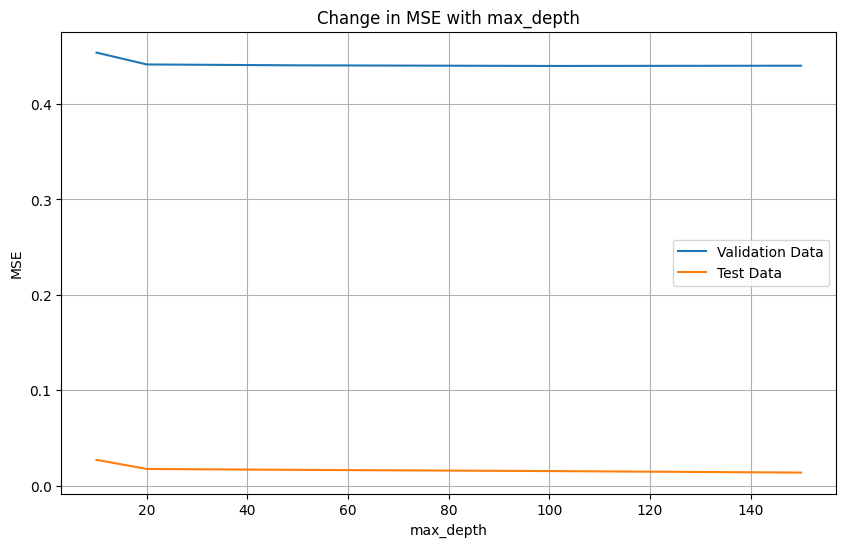

In [79]:
import matplotlib.pyplot as plt

# Plotting the MSE results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mse_valid_results, label='Validation Data')
plt.plot(max_depths, mse_test_results, label='Test Data')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Change in MSE with max_depth')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
# test 데이터에서 무작위로 5개의 매물 선택
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")
random_samples = test_data.sample(n=5, random_state=42)

X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

# Encode categorical features with one-hot encoding
categorical_features = ['city', 'state', 'zip_code']
encoder = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])


# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train, y_train)

X_random_samples = random_samples.drop('price', axis=1)

# Encode categorical features with one-hot encoding
for feature in categorical_features:
    X_random_samples[feature] = encoder.transform(X_random_samples[feature])

# Predict the prices for the random samples
predicted_prices = regressor_best.predict(X_random_samples)

# Add the 'predict_price' column to the random samples DataFrame
random_samples['predict_price'] = predicted_prices

# Decode the one-hot encoded features back to their original form
for feature in categorical_features:
    random_samples[feature] = encoder.inverse_transform(random_samples[feature])

# Print the updated DataFrame with predicted prices
print(random_samples[['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'price', 'predict_price']])

# 예측된 가격 출력
print(">>>>>>>>>>>>>>>>>>All Hyperparam test finished")
print("The best validation mse: {:.4f} when max_depth: {}".format(min(mse_valid_results), best_max_depth))
print("-" * 20)
# print("bed, bath, acre_lot, city, state, zip_code, house_size, price, predicted_price")
print("bed, bath, acre_lot, zip_code, house_size, price, predicted_price")
print("-" * 20)
for i, price in enumerate(predicted_prices):
    sample = random_samples.iloc[i]
    bed = sample['bed']
    bath = sample['bath']
    acre_lot = sample['acre_lot']
    # city = sample['city']
    # state = sample['state']
    zip_code = sample['zip_code']
    house_size = sample['house_size']
    # print(f"{bed}, {bath}, {acre_lot}, {city}, {state}, {zip_code}, {house_size}, {price:.1f}")
    print(f"{bed}, {bath}, {acre_lot}, {zip_code}, {house_size}, {price:.1f}")
print("-------------------------------------------------------------------")


ValueError: ignored

In [66]:
# test 데이터에서 무작위로 5개의 매물 선택
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")
random_samples = test_data.sample(n=5, random_state=42)

# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=50)

In [67]:
predicted_prices = regressor_best.predict(random_samples)

ValueError: ignored

In [64]:
print(predicted_prices)

[2.12289598 2.90602211 2.90602211 2.12289598 3.53567125 2.12289598
 1.84734578 3.53567125 2.12289598 2.12289598]


In [65]:
y_predces = regressor_best.predict(random_samples)

ValueError: ignored

In [60]:
print(random_samples)

      bed  bath  acre_lot       city          state  zip_code  house_size  \
3253  4.0   2.0      0.22  Worcester  Massachusetts    1602.0      1568.0   
3915  3.0   3.0      0.30  Woodstock    Connecticut    6282.0      1536.0   
1010  3.0   2.0      0.39  Salisbury    Connecticut    6068.0      1524.0   
1954  3.0   2.0      0.69  Worcester  Massachusetts    1609.0      1243.0   
1580  8.0   4.0      0.10  Worcester  Massachusetts    1610.0      3678.0   

         price  
3253  419900.0  
3915  319900.0  
1010  695000.0  
1954  394999.0  
1580  524900.0  


In [61]:
random_samples['predict_price'] = regressor.predict(random_samples)

NotFittedError: ignored

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Load train and test data
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# Create and train the Decision Tree model
regressor = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

# Select 5 random samples from the test data
random_samples = test_data.sample(n=5, random_state=42)

# Remove the 'price' column from the random samples
+

# Predict the prices for the random samples
predicted_prices = regressor.predict(X_random_samples)

# Add the 'predict_price' column to the random samples DataFrame
random_samples['predict_price'] = predicted_prices

# Print the updated DataFrame with predicted prices
print(random_samples[['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'price', 'predict_price']])


SyntaxError: ignored

In [71]:
from sklearn.preprocessing import LabelEncoder

random_samples = test_data.sample(n=5, random_state=42)

X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

# Encode categorical features with one-hot encoding
categorical_features = ['city', 'state', 'zip_code']
encoder = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])


# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train, y_train)

X_random_samples = random_samples.drop('price', axis=1)

# Encode categorical features with one-hot encoding
for feature in categorical_features:
    X_random_samples[feature] = encoder.transform(X_random_samples[feature])

# Predict the prices for the random samples
predicted_prices = regressor.predict(X_random_samples)

# Add the 'predict_price' column to the random samples DataFrame
random_samples['predict_price'] = predicted_prices

# Decode the one-hot encoded features back to their original form
for feature in categorical_features:
    random_samples[feature] = encoder.inverse_transform(random_samples[feature])

# Print the updated DataFrame with predicted prices
print(random_samples[['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'price', 'predict_price']])


ValueError: ignored

In [72]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Load train and test data
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# Separate input variables and target variable for training
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

# Encode categorical features with one-hot encoding
categorical_features = ['city', 'state', 'zip_code']
encoder = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])

# Create and train the Decision Tree model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Select 5 random samples from the test data
random_samples = test_data.sample(n=5, random_state=42)

# Remove the 'price' column from the random samples
X_random_samples = random_samples.drop('price', axis=1)

# Encode categorical features with one-hot encoding
for feature in categorical_features:
    X_random_samples[feature] = encoder.transform(X_random_samples[feature])

# Predict the prices for the random samples
predicted_prices = regressor.predict(X_random_samples)

# Add the 'predict_price' column to the random samples DataFrame
random_samples['predict_price'] = predicted_prices

# Decode the one-hot encoded features back to their original form
for feature in categorical_features:
    random_samples[feature] = encoder.inverse_transform(random_samples[feature])

# Print the updated DataFrame with predicted prices
print(random_samples[['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'price', 'predict_price']])


ValueError: ignored

In [73]:
# Load train and test data
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# Separate input variables and target variable for training
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

# Perform one-hot encoding on categorical variables
categorical_columns = ['city', 'state', 'zip_code']
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)

# Select random samples
random_samples = X_test_encoded.sample(n=5, random_state=42)

# Decode one-hot encoded columns
original_columns = ['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size']
decoded_samples = random_samples[original_columns].copy()
decoded_samples['city'] = le_city.inverse_transform(decoded_samples['city'])
decoded_samples['state'] = le_state.inverse_transform(decoded_samples['state'])
decoded_samples['zip_code'] = le_zip_code.inverse_transform(decoded_samples['zip_code'])

# Make predictions using the trained model
predicted_prices = regressor.predict(random_samples)

# Add 'predict_price' column to DataFrame
decoded_samples['predict_price'] = predicted_prices

# Print the updated DataFrame
print(decoded_samples)


KeyError: ignored

In [54]:
random_samples

,bed,bath,acre_lot,city,state,zip_code,house_size,price
3253,4.0,2.0,0.22,Worcester,Massachusetts,1602.0,1568.0,419900.0
3915,3.0,3.0,0.30,Woodstock,Connecticut,6282.0,1536.0,319900.0
1010,3.0,2.0,0.39,Salisbury,Connecticut,6068.0,1524.0,695000.0
1954,3.0,2.0,0.69,Worcester,Massachusetts,1609.0,1243.0,394999.0
1580,8.0,4.0,0.10,Worcester,Massachusetts,1610.0,3678.0,524900.0


In [53]:
# test 데이터에서 무작위로 5개의 매물 선택
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

random_samples = test_data.sample(n=5, random_state=42)

# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

# random_samples['predict_price'] = regressor.predict(random_samples)
#-----------------------------------------------------------------------------------------------------------------------------#

# 선택된 매물에 대한 가격 예측
# predicted_prices = regressor_best.predict(random_samples)
print("!!!!!!!!!!!!!!!!1")
print(predicted_prices)
# 예측된 가격 출력
print(">>>>>>>>>>>>>>>>>>All Hyperparam test finished")
print("The best validation mse: {:.4f} when max_depth: {}".format(min(mse_valid_results), best_max_depth))
print("-" * 20)
# print("bed, bath, acre_lot, city, state, zip_code, house_size, price, predicted_price")
print("bed, bath, acre_lot, zip_code, house_size, price, predicted_price")
print("-" * 20)
for i, price in enumerate(predicted_prices):
    sample = random_samples.iloc[i]
    bed = sample['bed']
    bath = sample['bath']
    acre_lot = sample['acre_lot']
    # city = sample['city']
    # state = sample['state']
    zip_code = sample['zip_code']
    # house_size_price = sample['house_size_price']
    # print(f"{bed}, {bath}, {acre_lot}, {city}, {state}, {zip_code}, {house_size_price}, {price:.1f}")
    print(f"{bed}, {bath}, {acre_lot}, {zip_code}, {price:.1f}")
print("-------------------------------------------------------------------")



!!!!!!!!!!!!!!!!1
[2.12289598 2.90602211 2.90602211 2.12289598 3.53567125 2.12289598
 1.84734578 3.53567125 2.12289598 2.12289598]
>>>>>>>>>>>>>>>>>>All Hyperparam test finished
The best validation mse: 0.4397 when max_depth: 50
--------------------
bed, bath, acre_lot, zip_code, house_size, price, predicted_price
--------------------
4.0, 2.0, 0.22, 1602.0, 2.1
3.0, 3.0, 0.3, 6282.0, 2.9
3.0, 2.0, 0.39, 6068.0, 2.9
3.0, 2.0, 0.69, 1609.0, 2.1
8.0, 4.0, 0.1, 1610.0, 3.5


IndexError: ignored

In [37]:
# test 데이터에서 무작위로 5개의 매물 선택
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

random_samples = test_data.sample(n=5, random_state=42)
print(random_samples)

      bed  bath  acre_lot       city          state  zip_code  house_size  \
3253  4.0   2.0      0.22  Worcester  Massachusetts    1602.0      1568.0   
3915  3.0   3.0      0.30  Woodstock    Connecticut    6282.0      1536.0   
1010  3.0   2.0      0.39  Salisbury    Connecticut    6068.0      1524.0   
1954  3.0   2.0      0.69  Worcester  Massachusetts    1609.0      1243.0   
1580  8.0   4.0      0.10  Worcester  Massachusetts    1610.0      3678.0   

         price  
3253  419900.0  
3915  319900.0  
1010  695000.0  
1954  394999.0  
1580  524900.0  


In [43]:
from sklearn.impute import SimpleImputer
# 테스트 데이터에서 무작위로 5개의 부동산 정보 선택
random_samples = test_data.sample(n=5, random_state=42)

# 예측에 사용할 특성 추출

# 범주형 변수를 원-핫 인코딩으로 전처리
X_random_samples_encoded = encoder.transform(X_random_samples[['city', 'state']])
X_random_samples_encoded_df = pd.DataFrame(X_random_samples_encoded, columns=encoder.get_feature_names_out(['city', 'state']))
X_random_samples_processed = pd.concat([X_random_samples.drop(['city', 'state'], axis=1), X_random_samples_encoded_df], axis=1)

# 결측값을 평균으로 대체하는 Imputer 생성
imputer = SimpleImputer(strategy='mean')
X_random_samples_imputed = imputer.fit_transform(X_random_samples_processed)

# 학습된 모델을 사용하여 무작위로 선택된 부동산에 대한 예측 수행
predicted_prices = regressor.predict(X_random_samples_imputed)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [46]:
X_random_samples

,bed,bath,acre_lot,city,state,zip_code,house_size
3253,4.0,2.0,0.22,Worcester,Massachusetts,1602.0,1568.0
3915,3.0,3.0,0.30,Woodstock,Connecticut,6282.0,1536.0
1010,3.0,2.0,0.39,Salisbury,Connecticut,6068.0,1524.0
1954,3.0,2.0,0.69,Worcester,Massachusetts,1609.0,1243.0
1580,8.0,4.0,0.10,Worcester,Massachusetts,1610.0,3678.0


In [45]:
predicted_prices

array([2.12289598, 2.90602211, 2.90602211, 2.12289598, 3.53567125,
       2.12289598, 1.84734578, 3.53567125, 2.12289598, 2.12289598])

In [44]:
# 'predict_price' 열을 DataFrame에 추가
random_samples['predict_price'] = predicted_prices

# 업데이트된 DataFrame 출력
print(random_samples)

ValueError: ignored

In [39]:
# 예측에 사용할 특성 추출
X_random_samples = random_samples.drop('price', axis=1)

# 범주형 변수를 원-핫 인코딩으로 전처리
X_random_samples_encoded = encoder.transform(X_random_samples[['city', 'state']])
X_random_samples_encoded_df = pd.DataFrame(X_random_samples_encoded, columns=encoder.get_feature_names_out(['city', 'state']))
X_random_samples_processed = pd.concat([X_random_samples.drop(['city', 'state'], axis=1), X_random_samples_encoded_df], axis=1)

In [40]:
# 학습된 모델을 사용하여 무작위로 선택된 부동산에 대한 예측 수행
predicted_prices = regressor.predict(X_random_samples_processed)

# 'predict_price' 열을 DataFrame에 추가
random_samples['predict_price'] = predicted_prices

# 업데이트된 DataFrame 출력
print(random_samples)


ValueError: ignored

In [34]:
train_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/lecture/data/realtor-data_test.csv")

# 테스트 데이터에서 무작위로 5개의 매물 선택
random_samples = test_data.sample(n=5, random_state=42)

# Print the updated DataFrame
print(random_samples)

      bed  bath  acre_lot       city          state  zip_code  house_size  \
3253  4.0   2.0      0.22  Worcester  Massachusetts    1602.0      1568.0   
3915  3.0   3.0      0.30  Woodstock    Connecticut    6282.0      1536.0   
1010  3.0   2.0      0.39  Salisbury    Connecticut    6068.0      1524.0   
1954  3.0   2.0      0.69  Worcester  Massachusetts    1609.0      1243.0   
1580  8.0   4.0      0.10  Worcester  Massachusetts    1610.0      3678.0   

         price  
3253  419900.0  
3915  319900.0  
1010  695000.0  
1954  394999.0  
1580  524900.0  


In [35]:
# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

random_samples['predict_price'] = regressor.predict(random_samples)

ValueError: ignored

In [29]:
# 테스트 데이터에서 무작위로 5개의 매물 선택
random_samples = test_data.sample(n=5, random_state=42)
print(random_samples)

      bed  bath  acre_lot       city          state  zip_code  house_size  \
3253  4.0   2.0      0.22  Worcester  Massachusetts    1602.0      1568.0   
3915  3.0   3.0      0.30  Woodstock    Connecticut    6282.0      1536.0   
1010  3.0   2.0      0.39  Salisbury    Connecticut    6068.0      1524.0   
1954  3.0   2.0      0.69  Worcester  Massachusetts    1609.0      1243.0   
1580  8.0   4.0      0.10  Worcester  Massachusetts    1610.0      3678.0   

         price  
3253  419900.0  
3915  319900.0  
1010  695000.0  
1954  394999.0  
1580  524900.0  


In [25]:
# 최적의 max_depth로 결정 트리 회귀 모델 생성 및 훈련
regressor_best = DecisionTreeRegressor(max_depth=best_max_depth)
regressor_best.fit(X_train_processed, y_train)

#-----------------------------------------------------------------------------------------------------------------------------#

# 선택된 매물에 대한 가격 예측
predicted_prices = regressor_best.predict(random_samples)
print("!!!!!!!!!!!!!!!!1")
print(predicted_prices)
# 예측된 가격 출력
print(">>>>>>>>>>>>>>>>>>All Hyperparam test finished")
print("The best validation mse: {:.4f} when max_depth: {}".format(min(mse_valid_results), best_max_depth))
print("-" * 20)
# print("bed, bath, acre_lot, city, state, zip_code, house_size, price, predicted_price")
print("bed, bath, acre_lot, zip_code, house_size, price, predicted_price")
print("-" * 20)
for i, price in enumerate(predicted_prices):
    sample = random_samples.iloc[i]
    bed = sample['bed']
    bath = sample['bath']
    acre_lot = sample['acre_lot']
    # city = sample['city']
    # state = sample['state']
    zip_code = sample['zip_code']
    house_size_price = sample['house_size_price']
    # print(f"{bed}, {bath}, {acre_lot}, {city}, {state}, {zip_code}, {house_size_price}, {price:.1f}")
    print(f"{bed}, {bath}, {acre_lot}, {zip_code}, {house_size_price}, {price:.1f}")
print("-------------------------------------------------------------------")


ValueError: ignored